Sample Mean Vector:
[2.94209729 8.03854629]

Sample Covariance Matrix:
[[1.07744835 1.02467229]
 [1.02467229 2.02899907]]

rho: 0.7071
Sample Correlation: 0.6930

Bootstrap 95% CI for rho: (0.5813, 0.7847)
Fisher's 95% CI for rho: (0.5749, 0.7829)


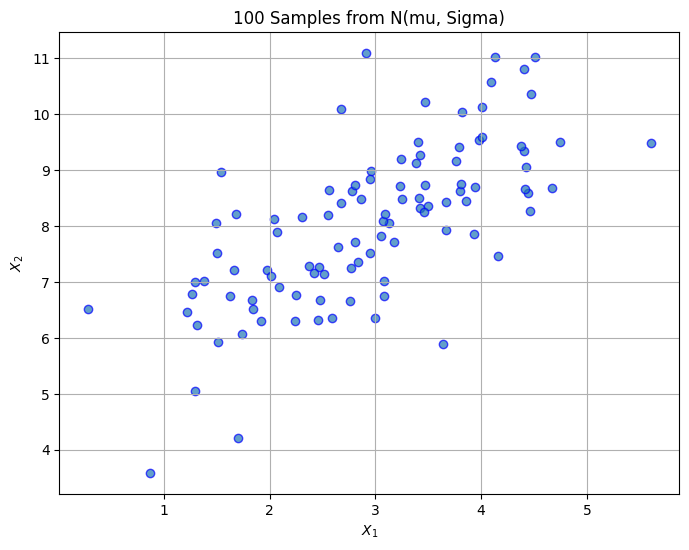

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import fisher_exact
from scipy.stats import norm
from scipy.stats import pearsonr
from sklearn.utils import resample

# 95% CI for bootstrap
def bootstrap_correlation(data, n_bootstrap=1000, confidence_level=0.95):
    boot_corrs = []
    n = data.shape[0]
    for _ in range(n_bootstrap):
        boot_sample = resample(data, replace=True, n_samples=n)
        boot_X1 = boot_sample[:, 0]
        boot_X2 = boot_sample[:, 1]
        corr, _ = pearsonr(boot_X1, boot_X2)
        boot_corrs.append(corr)
    lower = np.percentile(boot_corrs, (1 - confidence_level) / 2 * 100)
    upper = np.percentile(boot_corrs, (1 + confidence_level) / 2 * 100)
    return lower, upper

# 95% CI for fisher info matrix
def fishers_z_confidence_interval(r, n, confidence_level=0.95):
    # z transformation
    z = np.arctanh(r)
    se = 1 / np.sqrt(n - 3)
    alpha = 1 - confidence_level
    z_lower = z - norm.ppf(1 - alpha/2) * se
    z_upper = z + norm.ppf(1 - alpha/2) * se
    # then transform back to correlation
    r_lower = np.tanh(z_lower)
    r_upper = np.tanh(z_upper)
    return r_lower, r_upper




mu = np.array([3, 8]) #mean vector
Sigma = np.array([[1, 1],
                  [1, 2]]) #covariance matrix
#generate samples
n_samples = 100
data = np.random.multivariate_normal(mu, Sigma, n_samples)

#split to simplify plotting
X1 = data[:, 0]
X2 = data[:, 1]

# estimate sample params
sample_mean = np.mean(data, axis=0)
sample_cov = np.cov(data, rowvar=False)

print("Sample Mean Vector:")
print(sample_mean)
print("\nSample Covariance Matrix:")
print(sample_cov)

#theoretical rho
rho = Sigma[0,1] / np.sqrt(Sigma[0,0] * Sigma[1,1])
print(f"\nrho: {rho:.4f}")

# sample correlation
sample_corr, _ = pearsonr(X1, X2)
print(f"Sample Correlation: {sample_corr:.4f}")

bootstrap_lower, bootstrap_upper = bootstrap_correlation(data)
print(f"\nBootstrap 95% CI for rho: ({bootstrap_lower:.4f}, {bootstrap_upper:.4f})")

fishers_lower, fishers_upper = fishers_z_confidence_interval(sample_corr, n_samples)
print(f"Fisher's 95% CI for rho: ({fishers_lower:.4f}, {fishers_upper:.4f})")

plt.figure(figsize=(8, 6))
plt.scatter(X1, X2, alpha=0.7, edgecolors='b')
plt.title('100 Samples from N(mu, Sigma)')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid(True)
plt.show()